In [1]:
# Импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
sns.set_style("whitegrid")

%matplotlib inline

SEED = 42

import sklearn
# from sklearn import metrics #метрики
# from sklearn import model_selection #методы разделения и валидации
# from sklearn import linear_model #линейные модели
# from sklearn import tree #деревья решений

# from scipy import stats
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate
# from sklearn.pipeline import Pipeline

import sympy

from sympy import (
    Symbol, 
    S,
    simplify, 
    latex,
    sin,
    cos,
    exp,
    log,
    sqrt,
    FiniteSet,
    Union,
    Interval,
    Contains,
    ConditionSet,
    Eq,
    solveset, solve,
    diff,
    limit,
    im,
    N,
    oo
)

from sympy.calculus.util import (
    function_range,
    continuous_domain
)

import scipy

from scipy.optimize import minimize, least_squares

from IPython.display import display, Markdown

import sys
import os
from pathlib import Path

# Определяем путь к директории ноутбука
# Простое решение: определяем папку, где находится файл ноутбука
notebook_dir = None

# Способ 1: Используем библиотеку ipynbname (самый надежный способ)
# Если библиотека не установлена, она будет установлена автоматически
try:
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except ImportError:
    # Устанавливаем библиотеку, если её нет
    import subprocess
    import sys
    print("📦 Устанавливаю библиотеку ipynbname для определения пути к ноутбуку...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "-q"])
    import ipynbname
    nb_path = ipynbname.path()
    if nb_path:
        notebook_dir = str(Path(nb_path).parent.resolve())
except Exception as e:
    print(f"⚠️  Не удалось использовать ipynbname: {e}")

# Способ 2: Пробуем получить путь через IPython (запасной вариант)
if notebook_dir is None:
    try:
        from IPython import get_ipython
        ipython = get_ipython()
        if ipython is not None:
            if hasattr(ipython, 'start_dir'):
                notebook_dir = str(Path(ipython.start_dir).resolve())
    except:
        pass

# Способ 3: Если не удалось определить, выводим ошибку
if notebook_dir is None:
    print(f"❌ ОШИБКА: Не удалось определить папку ноутбука!")
    print(f"   Текущая рабочая директория: {os.getcwd()}")
    print(f"   Установите библиотеку: pip install ipynbname")
    raise RuntimeError("Не удалось определить директорию ноутбука. Установите: pip install ipynbname")

# Выводим информацию для диагностики
print(f"📂 Директория ноутбука: {notebook_dir}")
print(f"📂 Текущая рабочая директория (до chdir): {os.getcwd()}")

# Добавляем путь к директории ноутбука в sys.path (в начало для приоритета)
if notebook_dir not in sys.path:
    sys.path.insert(0, notebook_dir)

# Меняем рабочую директорию на директорию ноутбука, чтобы относительные пути работали
os.chdir(notebook_dir)
print(f"📂 Рабочая директория установлена: {os.getcwd()}")

# Импортируем helper (если существует)
try:
    from helper.functionanalyzer import FunctionAnalyzer
except ImportError:
    print("⚠️  Модуль helper.functionanalyzer не найден (это нормально, если он не используется)")


from tqdm import tqdm
import time

print(f'Numpy version {np.__version__}')
print(f'Pandas version {pd.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'scipy version {scipy.__version__}')
print(f'sympy version {sympy.__version__}')

from sklearnex import patch_sklearn, config_context
patch_sklearn()

import cupy as cp

# Пробуем импортировать nvmath независимо от версии Python
# (модуль может быть обновлен и поддерживать более новые версии)
try:
    import nvmath
    print(f"✅ Модуль nvmath успешно импортирован (Python {sys.version_info.major}.{sys.version_info.minor})")
except ImportError as e:
    # Проверяем, связана ли ошибка с версией Python
    if sys.version_info >= (3, 13):
        print(f"⚠️  Модуль nvmath не установлен или не поддерживает Python {sys.version_info.major}.{sys.version_info.minor}")
        print(f"   Попробуйте обновить nvmath: pip install --upgrade nvmath")
        print(f"   Или используйте Python 3.12 или ниже для полной совместимости")
    else:
        print(f"⚠️  Модуль nvmath не установлен (Python {sys.version_info.major}.{sys.version_info.minor})")
        print(f"   Установите: pip install nvmath")
except Exception as e:
    print(f"⚠️  Ошибка при импорте nvmath: {e}")

📂 Директория ноутбука: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-9. Математика ансамблевых методов
📂 Текущая рабочая директория (до chdir): c:\Users\stepu\OneDrive\IDE
📂 Рабочая директория установлена: C:\Users\stepu\OneDrive\IDE\skillfactory\Блок 6\MATH&ML-9. Математика ансамблевых методов
Numpy version 1.26.4
Pandas version 2.2.3
sklearn version 1.5.2
scipy version 1.15.1
sympy version 1.13.3


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


⚠️  Модуль nvmath не установлен или не поддерживает Python 3.13
   Попробуйте обновить nvmath: pip install --upgrade nvmath
   Или используйте Python 3.12 или ниже для полной совместимости


# 6. Бустинг. Практика
В этом юните мы решим практический кейс с использованием данного алгоритма, а также сравним изученные модификации бустинга.
Мы будем работать c данными, которые содержат результаты опроса клиентов авиакомпании по поводу их удовлетворённости полётом.

Нашей задачей будет предсказать удовлетворённость пассажиров.

### Признаки в данных

Gender — пол пассажира (женский, мужской);
Customer Type — тип клиента (постоянный/непостоянный клиент);
Age — возраст клиента;
Type of Travel — цель перелета (личная/деловая поездка);
Class — туристический класс пассажира (Business, Eco, Eco Plus);
Flight distance — расстояние полета;
Inflight wifi service — уровень удовлетворённости Wi-Fi (0 — не применимо, 1–5);
Departure/Arrival time convenient — уровень удовлетворённости временем отправления и прибытия;
Ease of Online booking — уровень удовлетворённости онлайн-бронированием;
Gate location — уровень удовлетворённости расположением выхода на посадку;
Food and drink — уровень удовлетворённости едой и напитками;
Online boarding — уровень удовлетворённости онлайн-регистрацией;
Seat comfort — уровень удовлетворённости комфортом сидений;
Inflight entertainment — уровень удовлетворённости развлечениями на борту;
On-board service — уровень удовлетворённости сервисом на борту;
Leg room service — уровень удовлетворённости местом для ног;
Baggage handling — уровень удовлетворённости обработкой багажа;
Check-in service — уровень удовлетворённости услугами регистрации;
Inflight service — уровень удовлетворённости обслуживанием во время полёта;
Cleanliness — уровень удовлетворённости чистотой;
Departure Delay in Minutes — задержка при отправлении (в минутах);
Arrival Delay in Minutes — задержка при прибытии (в минутах);
Satisfaction — удовлетворённость авиакомпанией — целевая переменная (satisfaction/neutral/dissatisfaction).



In [2]:
!pip install xgboost
!pip install catboost


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 1.5 MB/s eta 0:01:10
   ---------------------------------------- 1.0/102.4 MB 2.2 MB/s eta 0:00:47
    --------------------------------------- 1.6/102.4 MB 2.5 MB/s eta 0:00:40
    --------------------------------------- 2.4/102.4 MB 2.8 MB/s eta 0:00:36
   - -------------------------------------- 2.9/102.4 MB 2.9 MB/s eta 0:00:35
   - -------------------------------------- 3.1/102.4 MB 2.3 MB/s eta 0:00:44
   - -------------------------------------- 5.0/102.4 MB 3.3 MB/s eta 0:00:30
   -- ------------------------------------- 6.3/102.4 MB 3.5 MB/s eta 0:00:28
   -- ------------------------------------- 7.3/102.4 MB 3.7 MB/s eta 0:00:26
   --- -------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Внимание! Если при открытии данных первый столбец (порядковый номер строки) считался как отдельный признак, удалите его.

Примечание. Метрики f1_score необходимо получать по обеим (обучающей и тестовой) выборкам.

In [6]:
airpass_df = pd.read_csv('data/AirPass.csv', sep=',')

print(f"Размер датасета до обработки: {airpass_df.shape}")
print(f"\nНазвания столбцов:")
print(airpass_df.columns.tolist())

# Удаляем индексный столбец (Unnamed: 0) - это порядковый номер строки
# Столбец 'id' оставляем, так как это признак (ID пассажира)
if 'Unnamed: 0' in airpass_df.columns:
    print(f"\n⚠️  Удаляем индексный столбец 'Unnamed: 0' (порядковый номер строки)")
    airpass_df = airpass_df.drop(columns=['Unnamed: 0'])
    print(f"✅ Столбец 'Unnamed: 0' удален.")
else:
    print(f"\n✅ Индексный столбец 'Unnamed: 0' не найден.")

print(f"\nРазмер датасета после обработки: {airpass_df.shape}")
print(f"\nПервые строки:")
airpass_df.head()

Размер датасета до обработки: (103904, 25)

Названия столбцов:
['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']

⚠️  Удаляем индексный столбец 'Unnamed: 0' (порядковый номер строки)
✅ Столбец 'Unnamed: 0' удален.

Размер датасета после обработки: (103904, 24)

Первые строки:


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Задание 6.1
1 point possible (graded)
Для начала сделаем небольшую предобработку данных. Сколько всего в данных пропущенных значений?

In [7]:
# Подсчет пропущенных значений
missing_total = airpass_df.isnull().sum().sum()
missing_by_column = airpass_df.isnull().sum()

print(f"Общее количество пропущенных значений: {missing_total}")
print(f"\nПропущенные значения по столбцам:")
print(missing_by_column[missing_by_column > 0])

if missing_total == 0:
    print("\n✅ Пропущенных значений нет!")
else:
    print(f"\n📊 Детальная информация:")
    print(f"   Всего строк: {len(airpass_df)}")
    print(f"   Всего столбцов: {len(airpass_df.columns)}")
    print(f"   Столбцов с пропусками: {(missing_by_column > 0).sum()}")


Общее количество пропущенных значений: 310

Пропущенные значения по столбцам:
Arrival Delay in Minutes    310
dtype: int64

📊 Детальная информация:
   Всего строк: 103904
   Всего столбцов: 24
   Столбцов с пропусками: 1


## Задание 6.2
1 point possible (graded)
Теперь давайте избавимся от найденных пропусков. Заполните их все медианными значениями. После этого вычислите среднее арифметическое для признака, отражающего задержку при прибытии в минутах. Ответ округлите до двух знаков после точки-разделителя.

In [8]:
# Заполняем пропущенные значения медианными значениями
print("Заполнение пропущенных значений медианой...")
missing_before = airpass_df.isnull().sum().sum()
print(f"Пропущенных значений до заполнения: {missing_before}")

# Заполняем пропуски медианой для числовых столбцов
numeric_cols = airpass_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    missing_count = airpass_df[col].isnull().sum()
    if missing_count > 0:
        median_value = airpass_df[col].median()
        airpass_df[col].fillna(median_value, inplace=True)
        print(f"  Столбец '{col}': заполнено {missing_count} пропусков медианой = {median_value}")

missing_after = airpass_df.isnull().sum().sum()
print(f"\nПропущенных значений после заполнения: {missing_after}")

# Вычисляем среднее арифметическое для признака "Arrival Delay in Minutes"
arrival_delay_mean = airpass_df['Arrival Delay in Minutes'].mean()
arrival_delay_mean_rounded = round(arrival_delay_mean, 2)

print(f"\n📊 Результат:")
print(f"Среднее арифметическое для 'Arrival Delay in Minutes': {arrival_delay_mean}")
print(f"Округленное до 2 знаков после запятой: {arrival_delay_mean_rounded}")

arrival_delay_mean_rounded


Заполнение пропущенных значений медианой...
Пропущенных значений до заполнения: 310
  Столбец 'Arrival Delay in Minutes': заполнено 310 пропусков медианой = 0.0

Пропущенных значений после заполнения: 0

📊 Результат:
Среднее арифметическое для 'Arrival Delay in Minutes': 15.133392362180475
Округленное до 2 знаков после запятой: 15.13


15.13

## Задание 6.3
3 points possible (graded)
Проведём небольшой разведывательный анализ. Посмотрим, в каких категориях пассажиров превалировали удовлетворённые полетом клиенты.

Совет: для ответов на вопросы попробуйте использовать как вычисления, так и визуализации.

1. Сравните удовлетворённость полётом мужчин и женщин. Выберите верное утверждение:
Среди мужчин больше довольных, а среди женщин больше нейтрально настроенных/недовольных.
Среди женщин больше довольных, а среди мужчин больше нейтрально настроенных/недовольных.
В обеих категориях больше довольных.
В обеих категориях больше нейтрально настроенных/недовольных.

АНАЛИЗ УДОВЛЕТВОРЁННОСТИ ПО ПОЛУ

Уникальные значения в столбце 'satisfaction':
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

Уникальные значения в столбце 'Gender':
Gender
Female    52727
Male      51177
Name: count, dtype: int64

ТАБЛИЦА СОПРЯЖЁННОСТИ (проценты по строкам):
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      57.262882  42.737118
Male                        56.052524  43.947476
All                         56.666731  43.333269

ТАБЛИЦА СОПРЯЖЁННОСТИ (абсолютные значения):
satisfaction  neutral or dissatisfied  satisfied     All
Gender                                                  
Female                          30193      22534   52727
Male                            28686      22491   51177
All                             58879      45025  103904

ДЕТАЛЬНЫЙ АНАЛИЗ:

Male:
  neutral or dissatisfied: 28686 (56.05%)
  satisfied: 22491 

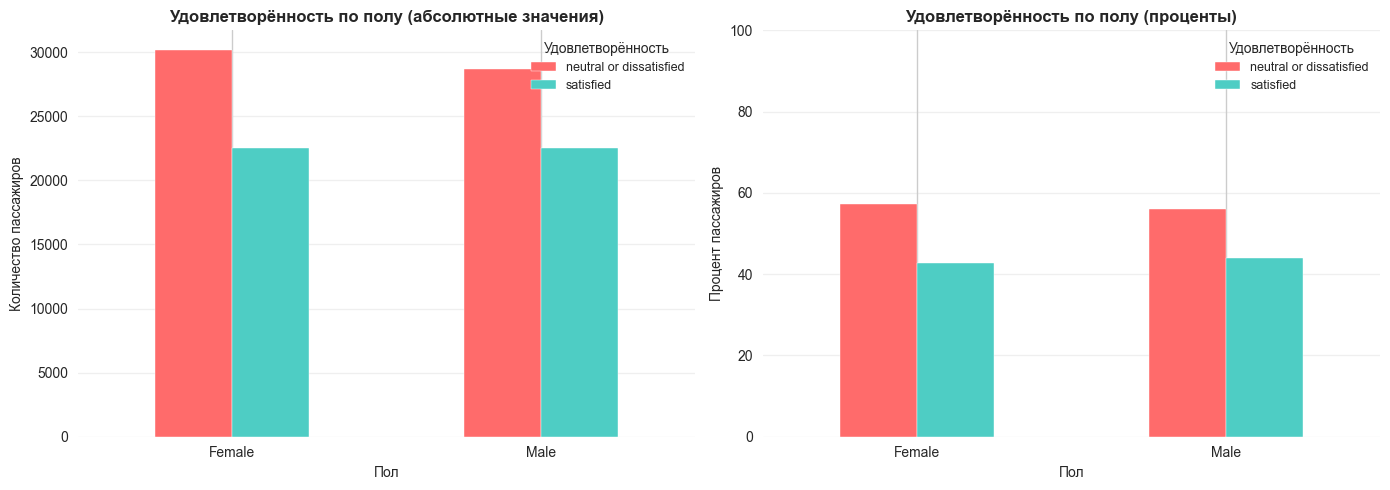


ВЫВОД:

Мужчины:
  Довольные: 43.95%
  Нейтральные/недовольные: 56.05%

Женщины:
  Довольные: 42.74%
  Нейтральные/недовольные: 57.26%

✅ В обеих категориях больше нейтрально настроенных/недовольных


In [10]:
# Анализ удовлетворённости по полу
print("=" * 60)
print("АНАЛИЗ УДОВЛЕТВОРЁННОСТИ ПО ПОЛУ")
print("=" * 60)

# Проверяем уникальные значения в столбце satisfaction
print(f"\nУникальные значения в столбце 'satisfaction':")
print(airpass_df['satisfaction'].value_counts())
print(f"\nУникальные значения в столбце 'Gender':")
print(airpass_df['Gender'].value_counts())

# Создаём таблицу сопряженности
satisfaction_by_gender = pd.crosstab(
    airpass_df['Gender'], 
    airpass_df['satisfaction'], 
    margins=True,
    normalize='index'  # Процент по строкам
)

print("\n" + "=" * 60)
print("ТАБЛИЦА СОПРЯЖЁННОСТИ (проценты по строкам):")
print("=" * 60)
print(satisfaction_by_gender * 100)

# Абсолютные значения
satisfaction_by_gender_abs = pd.crosstab(
    airpass_df['Gender'], 
    airpass_df['satisfaction'], 
    margins=True
)

print("\n" + "=" * 60)
print("ТАБЛИЦА СОПРЯЖЁННОСТИ (абсолютные значения):")
print("=" * 60)
print(satisfaction_by_gender_abs)

# Детальный анализ
print("\n" + "=" * 60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ:")
print("=" * 60)

for gender in airpass_df['Gender'].unique():
    gender_data = airpass_df[airpass_df['Gender'] == gender]
    total = len(gender_data)
    
    print(f"\n{gender}:")
    for satisfaction in airpass_df['satisfaction'].unique():
        count = len(gender_data[gender_data['satisfaction'] == satisfaction])
        pct = (count / total) * 100
        print(f"  {satisfaction}: {count} ({pct:.2f}%)")
    
    # Определяем преобладающую категорию
    satisfaction_counts = gender_data['satisfaction'].value_counts()
    dominant = satisfaction_counts.index[0]
    dominant_count = satisfaction_counts.iloc[0]
    dominant_pct = (dominant_count / total) * 100
    print(f"  → Преобладает: {dominant} ({dominant_pct:.2f}%)")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Столбчатая диаграмма (абсолютные значения)
satisfaction_by_gender_abs_plot = pd.crosstab(
    airpass_df['Gender'], 
    airpass_df['satisfaction']
)
satisfaction_by_gender_abs_plot.plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
axes[0].set_title('Удовлетворённость по полу (абсолютные значения)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Пол', fontsize=10)
axes[0].set_ylabel('Количество пассажиров', fontsize=10)
axes[0].legend(title='Удовлетворённость', fontsize=9)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# График 2: Столбчатая диаграмма (проценты)
satisfaction_by_gender_pct = pd.crosstab(
    airpass_df['Gender'], 
    airpass_df['satisfaction'],
    normalize='index'
) * 100
satisfaction_by_gender_pct.plot(kind='bar', ax=axes[1], color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
axes[1].set_title('Удовлетворённость по полу (проценты)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Пол', fontsize=10)
axes[1].set_ylabel('Процент пассажиров', fontsize=10)
axes[1].legend(title='Удовлетворённость', fontsize=9)
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()

# Вывод для ответа
print("\n" + "=" * 60)
print("ВЫВОД:")
print("=" * 60)

male_data = airpass_df[airpass_df['Gender'] == 'Male']
female_data = airpass_df[airpass_df['Gender'] == 'Female']

male_satisfied_pct = (len(male_data[male_data['satisfaction'] == 'satisfied']) / len(male_data)) * 100
female_satisfied_pct = (len(female_data[female_data['satisfaction'] == 'satisfied']) / len(female_data)) * 100

male_not_satisfied_pct = 100 - male_satisfied_pct
female_not_satisfied_pct = 100 - female_satisfied_pct

print(f"\nМужчины:")
print(f"  Довольные: {male_satisfied_pct:.2f}%")
print(f"  Нейтральные/недовольные: {male_not_satisfied_pct:.2f}%")

print(f"\nЖенщины:")
print(f"  Довольные: {female_satisfied_pct:.2f}%")
print(f"  Нейтральные/недовольные: {female_not_satisfied_pct:.2f}%")

# Правильная логика: проверяем, больше ли 50% довольных в каждой категории
if male_satisfied_pct > 50 and female_satisfied_pct > 50:
    print("\n✅ В обеих категориях больше довольных")
elif male_satisfied_pct <= 50 and female_satisfied_pct <= 50:
    print("\n✅ В обеих категориях больше нейтрально настроенных/недовольных")
elif male_satisfied_pct > 50 and female_satisfied_pct <= 50:
    print("\n✅ Среди мужчин больше довольных, а среди женщин больше нейтрально настроенных/недовольных")
elif female_satisfied_pct > 50 and male_satisfied_pct <= 50:
    print("\n✅ Среди женщин больше довольных, а среди мужчин больше нейтрально настроенных/недовольных")


### 2. Теперь сравним категории пассажиров в зависимости от их цели поездки. Выберите все верные утверждения:
A Среди тех, кто летал в деловую поездку, довольных больше, чем нейтрально настроенных/недовольных.
B Среди тех, кто летал в деловую поездку, довольных меньше, чем нейтрально настроенных/недовольных.
C Среди тех, кто летал по личным делам, довольных больше, чем нейтрально настроенных/недовольных.
D Среди тех, кто летал по личным делам, довольных меньше, чем нейтрально настроенных/недовольных.


АНАЛИЗ УДОВЛЕТВОРЁННОСТИ ПО ЦЕЛИ ПОЕЗДКИ

Уникальные значения в столбце 'Type of Travel':
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

ТАБЛИЦА СОПРЯЖЁННОСТИ (проценты по строкам):
satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                41.740283  58.259717
Personal Travel                89.832243  10.167757
All                            56.666731  43.333269

ТАБЛИЦА СОПРЯЖЁННОСТИ (абсолютные значения):
satisfaction     neutral or dissatisfied  satisfied     All
Type of Travel                                             
Business travel                    29909      41746   71655
Personal Travel                    28970       3279   32249
All                                58879      45025  103904

ДЕТАЛЬНЫЙ АНАЛИЗ:

Personal Travel:
  neutral or dissatisfied: 28970 (89.83%)
  satisfied: 3279 (10.17%)
  → Преобладает: neutral or dissatisfied (89.83%)

Business t

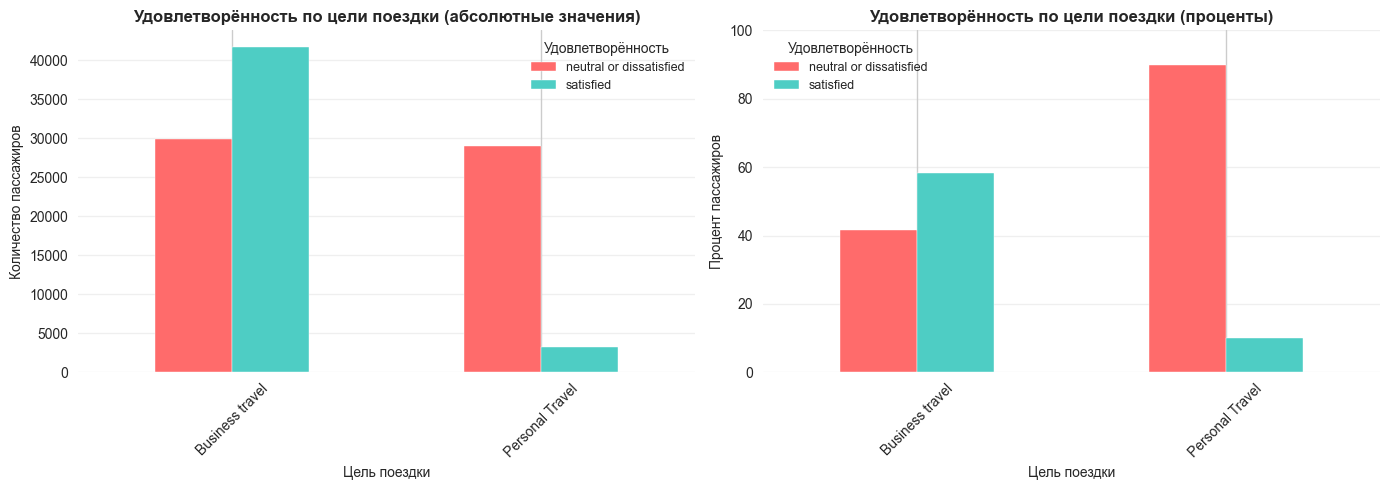


ВЫВОД:

Деловая поездка (Business travel):
  Довольные: 41746 (58.26%)
  Нейтральные/недовольные: 29909 (41.74%)
  ✅ A: Среди тех, кто летал в деловую поездку, довольных БОЛЬШЕ, чем нейтрально настроенных/недовольных

Личная поездка (Personal Travel):
  Довольные: 3279 (10.17%)
  Нейтральные/недовольные: 28970 (89.83%)
  ✅ D: Среди тех, кто летал по личным делам, довольных МЕНЬШЕ, чем нейтрально настроенных/недовольных

ИТОГОВЫЙ ОТВЕТ:
Верные утверждения: A, D


In [11]:
# Анализ удовлетворённости по цели поездки (Type of Travel)
print("=" * 60)
print("АНАЛИЗ УДОВЛЕТВОРЁННОСТИ ПО ЦЕЛИ ПОЕЗДКИ")
print("=" * 60)

# Проверяем уникальные значения
print(f"\nУникальные значения в столбце 'Type of Travel':")
print(airpass_df['Type of Travel'].value_counts())

# Создаём таблицу сопряженности
satisfaction_by_travel = pd.crosstab(
    airpass_df['Type of Travel'], 
    airpass_df['satisfaction'], 
    margins=True,
    normalize='index'  # Процент по строкам
)

print("\n" + "=" * 60)
print("ТАБЛИЦА СОПРЯЖЁННОСТИ (проценты по строкам):")
print("=" * 60)
print(satisfaction_by_travel * 100)

# Абсолютные значения
satisfaction_by_travel_abs = pd.crosstab(
    airpass_df['Type of Travel'], 
    airpass_df['satisfaction'], 
    margins=True
)

print("\n" + "=" * 60)
print("ТАБЛИЦА СОПРЯЖЁННОСТИ (абсолютные значения):")
print("=" * 60)
print(satisfaction_by_travel_abs)

# Детальный анализ
print("\n" + "=" * 60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ:")
print("=" * 60)

for travel_type in airpass_df['Type of Travel'].unique():
    travel_data = airpass_df[airpass_df['Type of Travel'] == travel_type]
    total = len(travel_data)
    
    print(f"\n{travel_type}:")
    for satisfaction in airpass_df['satisfaction'].unique():
        count = len(travel_data[travel_data['satisfaction'] == satisfaction])
        pct = (count / total) * 100
        print(f"  {satisfaction}: {count} ({pct:.2f}%)")
    
    # Определяем преобладающую категорию
    satisfaction_counts = travel_data['satisfaction'].value_counts()
    dominant = satisfaction_counts.index[0]
    dominant_count = satisfaction_counts.iloc[0]
    dominant_pct = (dominant_count / total) * 100
    print(f"  → Преобладает: {dominant} ({dominant_pct:.2f}%)")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Столбчатая диаграмма (абсолютные значения)
satisfaction_by_travel_abs_plot = pd.crosstab(
    airpass_df['Type of Travel'], 
    airpass_df['satisfaction']
)
satisfaction_by_travel_abs_plot.plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
axes[0].set_title('Удовлетворённость по цели поездки (абсолютные значения)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Цель поездки', fontsize=10)
axes[0].set_ylabel('Количество пассажиров', fontsize=10)
axes[0].legend(title='Удовлетворённость', fontsize=9)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# График 2: Столбчатая диаграмма (проценты)
satisfaction_by_travel_pct = pd.crosstab(
    airpass_df['Type of Travel'], 
    airpass_df['satisfaction'],
    normalize='index'
) * 100
satisfaction_by_travel_pct.plot(kind='bar', ax=axes[1], color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
axes[1].set_title('Удовлетворённость по цели поездки (проценты)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Цель поездки', fontsize=10)
axes[1].set_ylabel('Процент пассажиров', fontsize=10)
axes[1].legend(title='Удовлетворённость', fontsize=9)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()

# Вывод для ответа
print("\n" + "=" * 60)
print("ВЫВОД:")
print("=" * 60)

# Анализ для деловой поездки (Business travel)
business_data = airpass_df[airpass_df['Type of Travel'] == 'Business travel']
business_satisfied = len(business_data[business_data['satisfaction'] == 'satisfied'])
business_not_satisfied = len(business_data) - business_satisfied
business_satisfied_pct = (business_satisfied / len(business_data)) * 100
business_not_satisfied_pct = (business_not_satisfied / len(business_data)) * 100

print(f"\nДеловая поездка (Business travel):")
print(f"  Довольные: {business_satisfied} ({business_satisfied_pct:.2f}%)")
print(f"  Нейтральные/недовольные: {business_not_satisfied} ({business_not_satisfied_pct:.2f}%)")

if business_satisfied > business_not_satisfied:
    print(f"  ✅ A: Среди тех, кто летал в деловую поездку, довольных БОЛЬШЕ, чем нейтрально настроенных/недовольных")
else:
    print(f"  ✅ B: Среди тех, кто летал в деловую поездку, довольных МЕНЬШЕ, чем нейтрально настроенных/недовольных")

# Анализ для личной поездки (Personal Travel)
personal_data = airpass_df[airpass_df['Type of Travel'] == 'Personal Travel']
personal_satisfied = len(personal_data[personal_data['satisfaction'] == 'satisfied'])
personal_not_satisfied = len(personal_data) - personal_satisfied
personal_satisfied_pct = (personal_satisfied / len(personal_data)) * 100
personal_not_satisfied_pct = (personal_not_satisfied / len(personal_data)) * 100

print(f"\nЛичная поездка (Personal Travel):")
print(f"  Довольные: {personal_satisfied} ({personal_satisfied_pct:.2f}%)")
print(f"  Нейтральные/недовольные: {personal_not_satisfied} ({personal_not_satisfied_pct:.2f}%)")

if personal_satisfied > personal_not_satisfied:
    print(f"  ✅ C: Среди тех, кто летал по личным делам, довольных БОЛЬШЕ, чем нейтрально настроенных/недовольных")
else:
    print(f"  ✅ D: Среди тех, кто летал по личным делам, довольных МЕНЬШЕ, чем нейтрально настроенных/недовольных")

print("\n" + "=" * 60)
print("ИТОГОВЫЙ ОТВЕТ:")
print("=" * 60)
answers = []
if business_satisfied > business_not_satisfied:
    answers.append("A")
else:
    answers.append("B")
if personal_satisfied > personal_not_satisfied:
    answers.append("C")
else:
    answers.append("D")
print(f"Верные утверждения: {', '.join(answers)}")


### 3. В каком туристическом классе наибольший процент довольных клиентов?
Eco
Eco Plus
Business


АНАЛИЗ УДОВЛЕТВОРЁННОСТИ ПО ТУРИСТИЧЕСКОМУ КЛАССУ

Уникальные значения в столбце 'Class':
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

ТАБЛИЦА СОПРЯЖЁННОСТИ (проценты по строкам):
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                    30.574852  69.425148
Eco                         81.386245  18.613755
Eco Plus                    75.393648  24.606352
All                         56.666731  43.333269

ТАБЛИЦА СОПРЯЖЁННОСТИ (абсолютные значения):
satisfaction  neutral or dissatisfied  satisfied     All
Class                                                   
Business                        15185      34480   49665
Eco                             38044       8701   46745
Eco Plus                         5650       1844    7494
All                             58879      45025  103904

ДЕТАЛЬНЫЙ АНАЛИЗ:

Business:
  neutral or dissatisfied: 15185 (30.57%)
  satisfied: 34480 (69.4

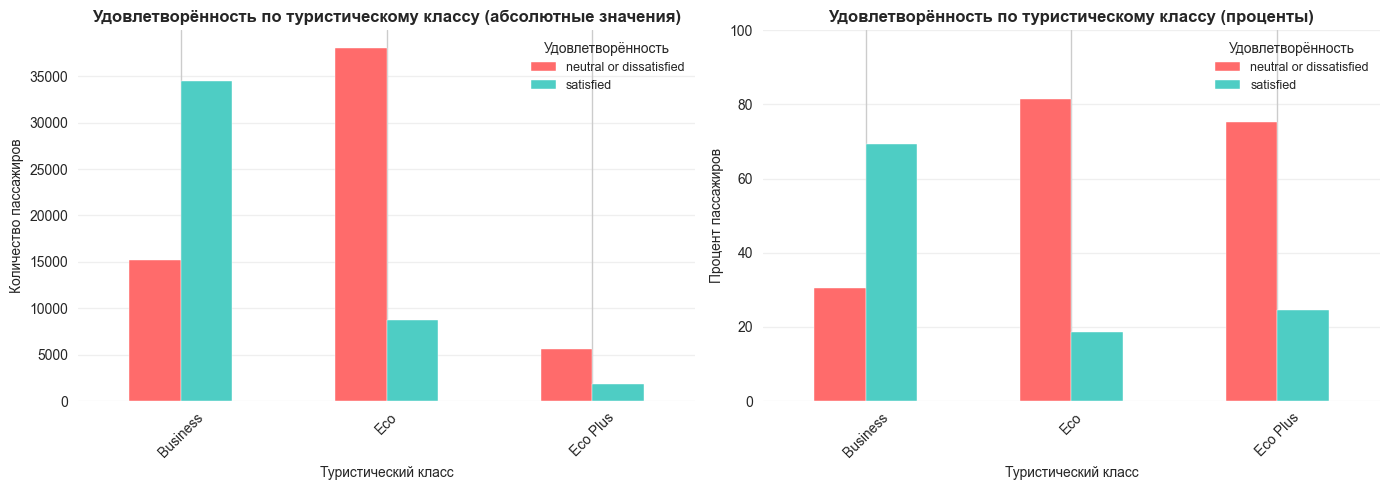


СРАВНЕНИЕ ПРОЦЕНТОВ ДОВОЛЬНЫХ ПО КЛАССАМ:
Business: 69.43%
Eco Plus: 24.61%
Eco: 18.61%

ОТВЕТ:
✅ Наибольший процент довольных клиентов в классе: Business (69.43%)


In [12]:
# Анализ удовлетворённости по туристическому классу (Class)
print("=" * 60)
print("АНАЛИЗ УДОВЛЕТВОРЁННОСТИ ПО ТУРИСТИЧЕСКОМУ КЛАССУ")
print("=" * 60)

# Проверяем уникальные значения
print(f"\nУникальные значения в столбце 'Class':")
print(airpass_df['Class'].value_counts())

# Создаём таблицу сопряженности
satisfaction_by_class = pd.crosstab(
    airpass_df['Class'], 
    airpass_df['satisfaction'], 
    margins=True,
    normalize='index'  # Процент по строкам
)

print("\n" + "=" * 60)
print("ТАБЛИЦА СОПРЯЖЁННОСТИ (проценты по строкам):")
print("=" * 60)
print(satisfaction_by_class * 100)

# Абсолютные значения
satisfaction_by_class_abs = pd.crosstab(
    airpass_df['Class'], 
    airpass_df['satisfaction'], 
    margins=True
)

print("\n" + "=" * 60)
print("ТАБЛИЦА СОПРЯЖЁННОСТИ (абсолютные значения):")
print("=" * 60)
print(satisfaction_by_class_abs)

# Детальный анализ и вычисление процента довольных для каждого класса
print("\n" + "=" * 60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ:")
print("=" * 60)

class_satisfaction_pct = {}

for class_type in sorted(airpass_df['Class'].unique()):
    class_data = airpass_df[airpass_df['Class'] == class_type]
    total = len(class_data)
    
    print(f"\n{class_type}:")
    for satisfaction in airpass_df['satisfaction'].unique():
        count = len(class_data[class_data['satisfaction'] == satisfaction])
        pct = (count / total) * 100
        print(f"  {satisfaction}: {count} ({pct:.2f}%)")
    
    # Вычисляем процент довольных
    satisfied_count = len(class_data[class_data['satisfaction'] == 'satisfied'])
    satisfied_pct = (satisfied_count / total) * 100
    class_satisfaction_pct[class_type] = satisfied_pct
    print(f"  → Процент довольных: {satisfied_pct:.2f}%")

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Столбчатая диаграмма (абсолютные значения)
satisfaction_by_class_abs_plot = pd.crosstab(
    airpass_df['Class'], 
    airpass_df['satisfaction']
)
satisfaction_by_class_abs_plot.plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
axes[0].set_title('Удовлетворённость по туристическому классу (абсолютные значения)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Туристический класс', fontsize=10)
axes[0].set_ylabel('Количество пассажиров', fontsize=10)
axes[0].legend(title='Удовлетворённость', fontsize=9)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# График 2: Столбчатая диаграмма (проценты)
satisfaction_by_class_pct = pd.crosstab(
    airpass_df['Class'], 
    airpass_df['satisfaction'],
    normalize='index'
) * 100
satisfaction_by_class_pct.plot(kind='bar', ax=axes[1], color=['#ff6b6b', '#4ecdc4', '#95e1d3'])
axes[1].set_title('Удовлетворённость по туристическому классу (проценты)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Туристический класс', fontsize=10)
axes[1].set_ylabel('Процент пассажиров', fontsize=10)
axes[1].legend(title='Удовлетворённость', fontsize=9)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0, 100])

plt.tight_layout()
plt.show()

# Определяем класс с наибольшим процентом довольных
print("\n" + "=" * 60)
print("СРАВНЕНИЕ ПРОЦЕНТОВ ДОВОЛЬНЫХ ПО КЛАССАМ:")
print("=" * 60)

for class_type, pct in sorted(class_satisfaction_pct.items(), key=lambda x: x[1], reverse=True):
    print(f"{class_type}: {pct:.2f}%")

max_class = max(class_satisfaction_pct, key=class_satisfaction_pct.get)
max_pct = class_satisfaction_pct[max_class]

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"✅ Наибольший процент довольных клиентов в классе: {max_class} ({max_pct:.2f}%)")


##
Перекодируем часть бинарных признаков, чтобы использовать их при обучении:
Образец:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [13]:
# Перекодировка бинарных признаков
print("Перекодировка бинарных признаков...")
print(f"Размер датасета до перекодировки: {airpass_df.shape}")

# Проверяем текущие значения перед перекодировкой
print("\nТекущие уникальные значения:")
print(f"satisfaction: {airpass_df['satisfaction'].unique()}")
print(f"Customer Type: {airpass_df['Customer Type'].unique()}")
print(f"Type of Travel: {airpass_df['Type of Travel'].unique()}")
print(f"Gender: {airpass_df['Gender'].unique()}")

# Перекодируем satisfaction
airpass_df['satisfaction'] = airpass_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
print("\n✅ Перекодирован столбец 'satisfaction': neutral or dissatisfied -> 0, satisfied -> 1")

# Перекодируем Customer Type
airpass_df['Customer Type'] = airpass_df['Customer Type'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
print("✅ Перекодирован столбец 'Customer Type': Loyal Customer -> 1, disloyal Customer -> 0")

# Перекодируем Type of Travel
airpass_df['Type of Travel'] = airpass_df['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})
print("✅ Перекодирован столбец 'Type of Travel': Personal Travel -> 0, Business travel -> 1")

# Перекодируем Gender
airpass_df['Gender'] = airpass_df['Gender'].map({'Male': 0, 'Female': 1})
print("✅ Перекодирован столбец 'Gender': Male -> 0, Female -> 1")

# Проверяем результат
print("\n" + "=" * 60)
print("ПРОВЕРКА РЕЗУЛЬТАТОВ ПЕРЕКОДИРОВКИ:")
print("=" * 60)
print(f"\nsatisfaction: {sorted(airpass_df['satisfaction'].unique())}")
print(f"Customer Type: {sorted(airpass_df['Customer Type'].unique())}")
print(f"Type of Travel: {sorted(airpass_df['Type of Travel'].unique())}")
print(f"Gender: {sorted(airpass_df['Gender'].unique())}")

print(f"\nРазмер датасета после перекодировки: {airpass_df.shape}")
print("\nПервые строки после перекодировки:")
airpass_df[['satisfaction', 'Customer Type', 'Type of Travel', 'Gender']].head(10)

Перекодировка бинарных признаков...
Размер датасета до перекодировки: (103904, 24)

Текущие уникальные значения:
satisfaction: ['neutral or dissatisfied' 'satisfied']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Gender: ['Male' 'Female']

✅ Перекодирован столбец 'satisfaction': neutral or dissatisfied -> 0, satisfied -> 1
✅ Перекодирован столбец 'Customer Type': Loyal Customer -> 1, disloyal Customer -> 0
✅ Перекодирован столбец 'Type of Travel': Personal Travel -> 0, Business travel -> 1
✅ Перекодирован столбец 'Gender': Male -> 0, Female -> 1

ПРОВЕРКА РЕЗУЛЬТАТОВ ПЕРЕКОДИРОВКИ:

satisfaction: [0, 1]
Customer Type: [0, 1]
Type of Travel: [0, 1]
Gender: [0, 1]

Размер датасета после перекодировки: (103904, 24)

Первые строки после перекодировки:


,satisfaction,Customer Type,Type of Travel,Gender
0,0,1,0,0
1,0,0,1,0
2,1,1,1,1
3,0,1,1,1
4,1,1,1,0
5,0,1,0,1
6,0,1,0,0
7,1,1,1,1
8,0,1,1,1
9,0,0,1,0


## Задание 6.4
1 point possible (graded)
Для остальных категориальных признаков создайте dummy-переменные. Сделайте это с помощью функции get_dummies() из библиотеки Pandas, параметры не меняйте. Сколько теперь признаков в данных (включая целевую переменную)?

In [14]:
# Создание dummy-переменных для остальных категориальных признаков
print("=" * 60)
print("СОЗДАНИЕ DUMMY-ПЕРЕМЕННЫХ")
print("=" * 60)

print(f"\nРазмер датасета до создания dummy-переменных: {airpass_df.shape}")
print(f"Количество признаков (включая целевую переменную): {airpass_df.shape[1]}")

# Определяем категориальные столбцы (object type), которые еще не перекодированы
categorical_cols = airpass_df.select_dtypes(include=['object']).columns.tolist()
print(f"\nКатегориальные столбцы (object type): {categorical_cols}")

# Создаем dummy-переменные для категориальных признаков
# Используем pd.get_dummies() без изменения параметров (по умолчанию)
airpass_df = pd.get_dummies(airpass_df)

print(f"\n✅ Dummy-переменные созданы")
print(f"\nРазмер датасета после создания dummy-переменных: {airpass_df.shape}")
print(f"Количество признаков (включая целевую переменную): {airpass_df.shape[1]}")

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"✅ Количество признаков в данных (включая целевую переменную): {airpass_df.shape[1]}")

print("\nНазвания всех столбцов:")
print(airpass_df.columns.tolist())


СОЗДАНИЕ DUMMY-ПЕРЕМЕННЫХ

Размер датасета до создания dummy-переменных: (103904, 24)
Количество признаков (включая целевую переменную): 24

Категориальные столбцы (object type): ['Class']

✅ Dummy-переменные созданы

Размер датасета после создания dummy-переменных: (103904, 26)
Количество признаков (включая целевую переменную): 26

ОТВЕТ:
✅ Количество признаков в данных (включая целевую переменную): 26

Названия всех столбцов:
['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction', 'Class_Business', 'Class_Eco', 'Class_Eco Plus']


## Задание 6.5
1 point possible (graded)
Мы практически добрались до обучения модели. Разбейте данные на обучающую и тестовую выборки в соотношении 80/20, параметр random_state = 26. Сколько наблюдений попало в тестовую выборку?

In [22]:
# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

print("=" * 60)
print("РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ")
print("=" * 60)

# Разделяем данные на признаки (X) и целевую переменную (y)
# Целевая переменная - это 'satisfaction'
X = airpass_df.drop('satisfaction', axis=1)
y = airpass_df['satisfaction']

print(f"\nРазмер исходного датасета: {airpass_df.shape}")
print(f"Размер признаков (X): {X.shape}")
print(f"Размер целевой переменной (y): {y.shape}")

# Разделяем данные в соотношении 80/20 с random_state = 26
# ВАЖНО: без stratify, как в эталонном решении
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% для тестовой выборки
    random_state=26
)

print(f"\n✅ Данные разделены на обучающую и тестовую выборки")
print(f"\nРазмер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер тестовой выборки (X_test): {X_test.shape}")
print(f"Размер целевой переменной обучающей выборки (y_train): {y_train.shape}")
print(f"Размер целевой переменной тестовой выборки (y_test): {y_test.shape}")

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"✅ Количество наблюдений в тестовой выборке: {len(X_test)}")


РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ

Размер исходного датасета: (103904, 26)
Размер признаков (X): (103904, 25)
Размер целевой переменной (y): (103904,)

✅ Данные разделены на обучающую и тестовую выборки

Размер обучающей выборки (X_train): (83123, 25)
Размер тестовой выборки (X_test): (20781, 25)
Размер целевой переменной обучающей выборки (y_train): (83123,)
Размер целевой переменной тестовой выборки (y_test): (20781,)

ОТВЕТ:
✅ Количество наблюдений в тестовой выборке: 20781


## Задание 6.6
1 point possible (graded)
Теперь нам необходимо реализовать масштабирование данных. Для этого обучите на обучающей выборке метод StandardScaler() и с помощью него преобразуйте и обучающую, и тестовую выборки. Не забудьте, что целевую переменную обрабатывать не нужно.

Примечание. Отметим, что если бы дальше мы работали только с деревьями, масштабирование бы не требовалось. Однако мы реализуем его, чтобы можно было обучать и другие модели и сравнивать полученные результаты.

В качестве ответа введите самое первое значение из матрицы преобразованных признаков тестовой выборки. Округлите значение до двух знаков после точки-разделителя.

In [25]:
# Масштабирование данных с помощью StandardScaler
# Эталонное решение
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

# Самое первое значение из матрицы преобразованных признаков тестовой выборки
first_value = X_test[0][0]
first_value_rounded = round(first_value, 2)

print(f"Первое значение X_test[0][0]: {first_value}")
print(f"Округленное до 2 знаков: {first_value_rounded}")

first_value_rounded

Первое значение X_test[0][0]: 0.9408251379303001
Округленное до 2 знаков: 0.94


0.94

## Задание 6.7
1 point possible (graded)
Перейдём к обучению моделей. В качестве первой модели возьмём самую простую — логистическую регрессию. Мы делаем это для того, чтобы потом сравнивать с ней полученные результаты: так вы сможете выяснить, насколько ансамбли смогут улучшить точность прогноза.

Обучите логистическую регрессию с параметрами по умолчанию на наших данных. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [26]:
# Обучение логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

print("=" * 60)
print("ОБУЧЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ")
print("=" * 60)

# Создаем модель логистической регрессии с параметрами по умолчанию
log_reg = LogisticRegression(random_state=SEED)

# Обучаем модель на обучающей выборке
print("\nОбучаем модель на обучающей выборке...")
log_reg.fit(X_train, y_train)
print("✅ Модель обучена")

# Делаем предсказания на тестовой выборке
print("\nДелаем предсказания на тестовой выборке...")
y_pred = log_reg.predict(X_test)
print("✅ Предсказания получены")

# Вычисляем f1_score
f1 = f1_score(y_test, y_pred)
f1_rounded = round(f1, 3)

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ:")
print("=" * 60)
print(f"f1_score: {f1}")
print(f"f1_score (округлено до 3 знаков): {f1_rounded}")

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"✅ Значение метрики f1_score (округлено до 3 знаков): {f1_rounded}")

f1_rounded


ОБУЧЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ

Обучаем модель на обучающей выборке...
✅ Модель обучена

Делаем предсказания на тестовой выборке...
✅ Предсказания получены

РЕЗУЛЬТАТЫ:
f1_score: 0.8546883773161146
f1_score (округлено до 3 знаков): 0.855

ОТВЕТ:
✅ Значение метрики f1_score (округлено до 3 знаков): 0.855


0.855

## Задание 6.8
1 point possible (graded)
Теперь перейдём к бустингу. Начнём с обучения первой модели — AdaBoost. В качестве базовой модели для неё возьмите решающее дерево с параметром random_state = 26.

Обучите AdaBoost, зафиксировав random_state со значением 26 и задав темп обучения 0.01. В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя.

In [28]:
# Обучение AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

print("=" * 60)
print("ОБУЧЕНИЕ ADABOOST")
print("=" * 60)

# Создаем базовую модель - решающее дерево с random_state = 26
base_estimator = DecisionTreeClassifier(random_state=26)

# Создаем модель AdaBoost с параметрами:
# - estimator: решающее дерево с random_state=26 (в новых версиях sklearn base_estimator заменен на estimator)
# - random_state=26
# - learning_rate=0.01
ada_boost = AdaBoostClassifier(
    estimator=base_estimator,
    random_state=26,
    learning_rate=0.01
)

# Обучаем модель на обучающей выборке
print("\nОбучаем AdaBoost на обучающей выборке...")
ada_boost.fit(X_train, y_train)
print("✅ Модель обучена")

# Делаем предсказания на тестовой выборке
print("\nДелаем предсказания на тестовой выборке...")
y_pred = ada_boost.predict(X_test)
print("✅ Предсказания получены")

# Вычисляем f1_score
f1 = f1_score(y_test, y_pred)
f1_rounded = round(f1, 3)

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ:")
print("=" * 60)
print(f"f1_score: {f1}")
print(f"f1_score (округлено до 3 знаков): {f1_rounded}")

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"✅ Значение метрики f1_score (округлено до 3 знаков): {f1_rounded}")

f1_rounded


ОБУЧЕНИЕ ADABOOST

Обучаем AdaBoost на обучающей выборке...
✅ Модель обучена

Делаем предсказания на тестовой выборке...
✅ Предсказания получены

РЕЗУЛЬТАТЫ:
f1_score: 0.9404794558121674
f1_score (округлено до 3 знаков): 0.94

ОТВЕТ:
✅ Значение метрики f1_score (округлено до 3 знаков): 0.94


0.94

## Задание 6.9
1 point possible (graded)
Перейдем к следующему алгоритму — градиентному бустингу.

Будем настраивать количество деревьев и темп обучения, делая перебор по следующей сетке:

params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}
Используйте для поиска оптимальных параметров GridSearchCV, а для ускорения работы алгоритма задайте параметр кросс-валидации, равный 3.

Какое наибольшее значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Примечание. Необходимо указать лучший результат в методе GridSearchCV на тренировочных данных.

In [29]:
# Настройка градиентного бустинга через GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

print("=" * 60)
print("НАСТРОЙКА ГРАДИЕНТНОГО БУСТИНГА")
print("=" * 60)

# Создаем сетку параметров
params = {"n_estimators": 2**np.arange(8), "learning_rate": 0.1**np.arange(3)}

print(f"\nСетка параметров:")
print(f"n_estimators: {params['n_estimators']}")
print(f"learning_rate: {params['learning_rate']}")
print(f"Всего комбинаций: {len(params['n_estimators']) * len(params['learning_rate'])}")

# Создаем базовую модель градиентного бустинга
gb = GradientBoostingClassifier(random_state=26)

# Создаем GridSearchCV с кросс-валидацией cv=3 и метрикой f1_score
grid_search = GridSearchCV(
    gb,
    params,
    cv=3,  # кросс-валидация с 3 фолдами
    scoring='f1',  # метрика f1_score
    n_jobs=-1,  # использовать все доступные ядра для ускорения
    verbose=1  # выводить прогресс
)

# Обучаем GridSearchCV на обучающей выборке
print("\nЗапускаем GridSearchCV...")
print("Это может занять некоторое время...")
grid_search.fit(X_train, y_train)
print("✅ GridSearchCV завершен")

# Получаем лучший результат на тренировочных данных (best_score_)
best_f1_score = grid_search.best_score_
best_f1_rounded = round(best_f1_score, 3)

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ:")
print("=" * 60)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший f1_score на тренировочных данных (best_score_): {best_f1_score}")
print(f"Лучший f1_score (округлено до 3 знаков): {best_f1_rounded}")

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"✅ Наибольшее значение метрики f1_score на тренировочных данных: {best_f1_rounded}")

best_f1_rounded


НАСТРОЙКА ГРАДИЕНТНОГО БУСТИНГА

Сетка параметров:
n_estimators: [  1   2   4   8  16  32  64 128]
learning_rate: [1.   0.1  0.01]
Всего комбинаций: 24

Запускаем GridSearchCV...
Это может занять некоторое время...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ GridSearchCV завершен

РЕЗУЛЬТАТЫ:
Лучшие параметры: {'learning_rate': 1.0, 'n_estimators': 128}
Лучший f1_score на тренировочных данных (best_score_): 0.9491095370461177
Лучший f1_score (округлено до 3 знаков): 0.949

ОТВЕТ:
✅ Наибольшее значение метрики f1_score на тренировочных данных: 0.949


0.949

## Задание 6.10
1 point possible (graded)
Обучите алгоритм XGBoost. Так как он достаточно мощный «из коробки», определите его с параметрами по умолчанию, только задайте random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Подсказка. Для того чтобы обучить алгоритм XGBoost для решения задачи классификации, вам понадобится XGBClassifier из библиотеки xgboost, установленной ранее. Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии.

In [30]:
# Обучение XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

print("=" * 60)
print("ОБУЧЕНИЕ XGBOOST")
print("=" * 60)

# Создаем модель XGBoost с параметрами по умолчанию, только random_state = 26
xgb_model = XGBClassifier(random_state=26)

# Обучаем модель на обучающей выборке
print("\nОбучаем XGBoost на обучающей выборке...")
xgb_model.fit(X_train, y_train)
print("✅ Модель обучена")

# Делаем предсказания на тестовой выборке
print("\nДелаем предсказания на тестовой выборке...")
y_pred = xgb_model.predict(X_test)
print("✅ Предсказания получены")

# Вычисляем f1_score
f1 = f1_score(y_test, y_pred)
f1_rounded = round(f1, 3)

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ:")
print("=" * 60)
print(f"f1_score: {f1}")
print(f"f1_score (округлено до 3 знаков): {f1_rounded}")

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"✅ Значение метрики f1_score (округлено до 3 знаков): {f1_rounded}")

f1_rounded


ОБУЧЕНИЕ XGBOOST

Обучаем XGBoost на обучающей выборке...
✅ Модель обучена

Делаем предсказания на тестовой выборке...
✅ Предсказания получены

РЕЗУЛЬТАТЫ:
f1_score: 0.9573723114544546
f1_score (округлено до 3 знаков): 0.957

ОТВЕТ:
✅ Значение метрики f1_score (округлено до 3 знаков): 0.957


0.957

## Задание 6.11
1 point possible (graded)
Обучите алгоритм CatBoost. Как и XGBoost, будем обучать его с настройками по умолчанию и заданным random_state = 26. Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя.

Подсказка. Для того чтобы обучить алгоритм CatBoost, вам понадобится CatBoostClassifier() из библиотеки catboost, установленной ранее. Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии.

In [31]:
# Обучение CatBoost
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

print("=" * 60)
print("ОБУЧЕНИЕ CATBOOST")
print("=" * 60)

# Создаем модель CatBoost с параметрами по умолчанию, только random_state = 26
catboost_model = CatBoostClassifier(random_state=26, verbose=False)

# Обучаем модель на обучающей выборке
print("\nОбучаем CatBoost на обучающей выборке...")
catboost_model.fit(X_train, y_train)
print("✅ Модель обучена")

# Делаем предсказания на тестовой выборке
print("\nДелаем предсказания на тестовой выборке...")
y_pred = catboost_model.predict(X_test)
print("✅ Предсказания получены")

# Вычисляем f1_score
f1 = f1_score(y_test, y_pred)
f1_rounded = round(f1, 3)

print("\n" + "=" * 60)
print("РЕЗУЛЬТАТЫ:")
print("=" * 60)
print(f"f1_score: {f1}")
print(f"f1_score (округлено до 3 знаков): {f1_rounded}")

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"✅ Значение метрики f1_score (округлено до 3 знаков): {f1_rounded}")

f1_rounded


ОБУЧЕНИЕ CATBOOST

Обучаем CatBoost на обучающей выборке...
✅ Модель обучена

Делаем предсказания на тестовой выборке...
✅ Предсказания получены

РЕЗУЛЬТАТЫ:
f1_score: 0.9609292502639916
f1_score (округлено до 3 знаков): 0.961

ОТВЕТ:
✅ Значение метрики f1_score (округлено до 3 знаков): 0.961


0.961

## Задание 6.12
4 points possible (graded)
Выведите матрицу ошибок для алгоритма, который получил наилучшие показатели качества модели на обучающей выборке (будем считать, что оцениваем по f1_score). Матрица ошибок выводится в следующем формате:

,   predicted 0,    predicted 1
Actual 0,   TN, FP
Actual 1,   FN, TP

Матрица ошибок
Значения в матрице ошибок переведите в проценты от общего числа наблюдений в обучающей выборке и округлите до целых.

Подсказка. Для того чтобы построить матрицу ошибок в CatBoost, необходимо использовать следующий шаблон:

get_confusion_matrix(модель, Pool(признаки обучающей выборки, целевая переменная обучающей выборки))

Более подробно построение матрицы ошибок можно изучить в документации.

Заполните соответствующие значения (в процентах от общего числа наблюдений в обучающей выборке, округленных до целого):

TN:
 % 
 
FP:
 % 
 
FN:
 %  
 
TP:
 % 

In [40]:
# Построение матрицы ошибок для лучшей модели
from sklearn.metrics import confusion_matrix, f1_score

print("=" * 60)
print("ОПРЕДЕЛЕНИЕ ЛУЧШЕЙ МОДЕЛИ ПО МЕТРИКАМ НА ТЕСТОВОЙ ВЫБОРКЕ")
print("=" * 60)

# Используем уже вычисленные метрики на тестовой выборке из предыдущих заданий
# Вычисляем f1_score на тестовой выборке для всех моделей
models = {
    'Logistic Regression': log_reg,
    'AdaBoost': ada_boost,
    'Gradient Boosting': grid_search.best_estimator_,
    'XGBoost': xgb_model,
    'CatBoost': catboost_model
}

f1_scores_test = {}

print("\nf1_score на тестовой выборке:")
for name, model in models.items():
    y_pred_test = model.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test)
    f1_scores_test[name] = f1_test
    print(f"  {name}: {f1_test:.6f}")

# Находим лучшую модель по f1_score на тестовой выборке
best_model_name = max(f1_scores_test, key=f1_scores_test.get)
best_model = models[best_model_name]
best_f1_test = f1_scores_test[best_model_name]

print("\n" + "=" * 60)
print(f"✅ Лучшая модель (по f1_score на тестовой выборке): {best_model_name}")
print(f"   f1_score на тестовой выборке: {best_f1_test:.6f}")
print("=" * 60)

# Строим матрицу ошибок для обучающей выборки
print("\n" + "=" * 60)
print("ПОСТРОЕНИЕ МАТРИЦЫ ОШИБОК ДЛЯ ОБУЧАЮЩЕЙ ВЫБОРКИ")
print("=" * 60)

# Для CatBoost пробуем использовать get_confusion_matrix с Pool
if best_model_name == 'CatBoost':
    try:
        from catboost import Pool, get_confusion_matrix
        print(f"\nПробуем использовать get_confusion_matrix для CatBoost...")
        train_pool = Pool(X_train, y_train)
        cm = get_confusion_matrix(best_model, train_pool)
        print("✅ Использован get_confusion_matrix")
        # get_confusion_matrix возвращает матрицу в формате [[TN, FP], [FN, TP]]
        TN, FP = cm[0]
        FN, TP = cm[1]
    except (ImportError, AttributeError) as e:
        print(f"⚠️  get_confusion_matrix недоступен: {e}")
        print("Используем стандартный confusion_matrix...")
        y_pred_train = best_model.predict(X_train)
        cm = confusion_matrix(y_train, y_pred_train)
        TN, FP = cm[0]
        FN, TP = cm[1]
else:
    # Для остальных моделей используем стандартный confusion_matrix
    print(f"\nИспользуем confusion_matrix для {best_model_name}...")
    y_pred_train = best_model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred_train)
    # confusion_matrix возвращает матрицу в формате [[TN, FP], [FN, TP]]
    TN, FP = cm[0]
    FN, TP = cm[1]

print(f"\nМатрица ошибок (абсолютные значения):")
print(f"  TN: {TN}, FP: {FP}")
print(f"  FN: {FN}, TP: {TP}")

# Преобразуем в проценты от общего числа наблюдений в обучающей выборке
total_train = len(y_train)
TN_pct = round((TN / total_train) * 100)
FP_pct = round((FP / total_train) * 100)
FN_pct = round((FN / total_train) * 100)
TP_pct = round((TP / total_train) * 100)

print("\n" + "=" * 60)
print("МАТРИЦА ОШИБОК (в процентах от общего числа наблюдений в обучающей выборке):")
print("=" * 60)
print(f"\n                predicted 0    predicted 1")
print(f"Actual 0        {TN_pct:3d}%          {FP_pct:3d}%")
print(f"Actual 1        {FN_pct:3d}%          {TP_pct:3d}%")

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"TN: {TN_pct}%")
print(f"FP: {FP_pct}%")
print(f"FN: {FN_pct}%")
print(f"TP: {TP_pct}%")

# Выводим значения для удобства копирования
print("\n" + "=" * 60)
print("ЗНАЧЕНИЯ ДЛЯ ЗАПОЛНЕНИЯ:")
print("=" * 60)
print(f"TN: {TN_pct}")
print(f"FP: {FP_pct}")
print(f"FN: {FN_pct}")
print(f"TP: {TP_pct}")


ОПРЕДЕЛЕНИЕ ЛУЧШЕЙ МОДЕЛИ ПО МЕТРИКАМ НА ТЕСТОВОЙ ВЫБОРКЕ

f1_score на тестовой выборке:
  Logistic Regression: 0.854688
  AdaBoost: 0.940479
  Gradient Boosting: 0.950642
  XGBoost: 0.957372
  CatBoost: 0.960929

✅ Лучшая модель (по f1_score на тестовой выборке): CatBoost
   f1_score на тестовой выборке: 0.960929

ПОСТРОЕНИЕ МАТРИЦЫ ОШИБОК ДЛЯ ОБУЧАЮЩЕЙ ВЫБОРКИ
⚠️  get_confusion_matrix недоступен: cannot import name 'get_confusion_matrix' from 'catboost' (c:\Users\stepu\OneDrive\IDE\.venv313\Lib\site-packages\catboost\__init__.py)
Используем стандартный confusion_matrix...

Матрица ошибок (абсолютные значения):
  TN: 46665, FP: 541
  FN: 1273, TP: 34644

МАТРИЦА ОШИБОК (в процентах от общего числа наблюдений в обучающей выборке):

                predicted 0    predicted 1
Actual 0         56%            1%
Actual 1          2%           42%

ОТВЕТ:
TN: 56%
FP: 1%
FN: 2%
TP: 42%

ЗНАЧЕНИЯ ДЛЯ ЗАПОЛНЕНИЯ:
TN: 56
FP: 1
FN: 2
TP: 42


## Задание 6.13
1 point possible (graded)
Оцените важность признаков для модели из предыдущего задания. Отметьте признак, который оказывает наибольшее влияние на значение целевой переменной:

Gender
Age
Type of Travel
Class
Flight distance
Inflight wifi service
Ease of Online booking
Online boarding
On-board service
Departure Delay in Minutes


ОЦЕНКА ВАЖНОСТИ ПРИЗНАКОВ

Используем модель: CatBoost

Количество признаков в модели: 25
Количество названий признаков: 25

ВАЖНОСТЬ ПРИЗНАКОВ (топ-15):
               feature  importance
 Inflight wifi service   25.059565
        Type of Travel   18.116438
       Online boarding    7.394096
         Customer Type    7.119970
        Class_Business    5.522659
       Checkin service    3.931326
      Baggage handling    3.525769
                   Age    3.493225
         Gate location    3.205085
Inflight entertainment    3.113948
          Seat comfort    2.987758
      Inflight service    2.926524
                    id    1.954304
           Cleanliness    1.822939
      On-board service    1.709424

ОТВЕТ:
✅ Признак с наибольшей важностью: Inflight wifi service
   Важность: 25.059565

ПРОВЕРКА ПРЕДЛОЖЕННЫХ ПРИЗНАКОВ:
  Gender: важность = 0.046654, ранг = 25
  Age: важность = 3.525769, ранг = 7
  Type of Travel: важность = 18.116438, ранг = 2
  Class: важность = 5.522659, ранг = 5

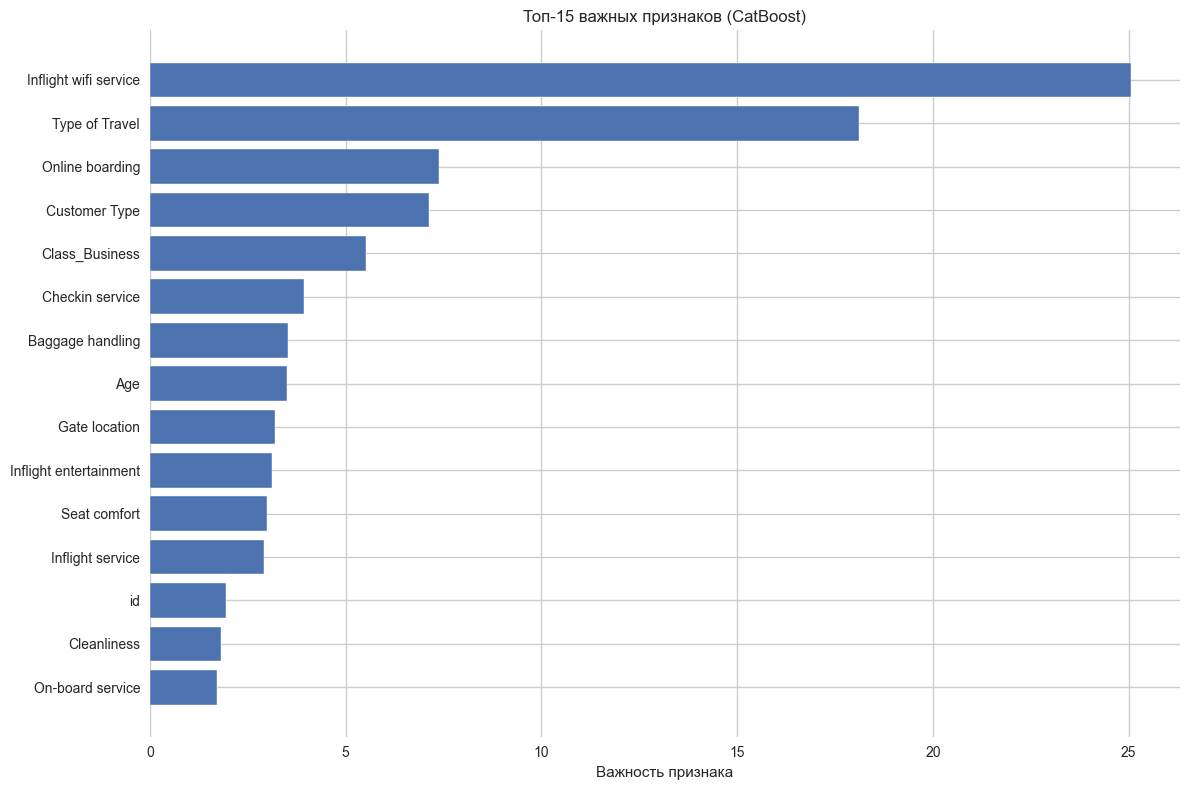


ИТОГОВЫЙ ОТВЕТ:
✅ Признак с наибольшим влиянием: Inflight wifi service


In [43]:
# Оценка важности признаков для лучшей модели


print("=" * 60)
print("ОЦЕНКА ВАЖНОСТИ ПРИЗНАКОВ")
print("=" * 60)

# Используем лучшую модель из предыдущего задания (CatBoost)
print(f"\nИспользуем модель: {best_model_name}")

# Получаем важность признаков
feature_importances = best_model.feature_importances_

# X_train после масштабирования - это numpy array, поэтому используем исходные названия столбцов
# Названия столбцов должны быть из X (до масштабирования)
# Если X - это DataFrame, используем X.columns, иначе используем airpass_df
if hasattr(X, 'columns'):
    feature_names = X.columns.tolist()
else:
    # Если X тоже массив, используем названия из исходного датасета (без satisfaction)
    feature_names = [col for col in airpass_df.columns if col != 'satisfaction']

# Проверяем количество признаков
print(f"\nКоличество признаков в модели: {len(feature_importances)}")
print(f"Количество названий признаков: {len(feature_names)}")

# Создаем DataFrame для удобства работы
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Сортируем по важности (по убыванию)
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

print("\n" + "=" * 60)
print("ВАЖНОСТЬ ПРИЗНАКОВ (топ-15):")
print("=" * 60)
print(feature_importance_df.head(15).to_string(index=False))

# Находим признак с наибольшей важностью
most_important_feature = feature_importance_df.iloc[0]['feature']
most_important_importance = feature_importance_df.iloc[0]['importance']

print("\n" + "=" * 60)
print("ОТВЕТ:")
print("=" * 60)
print(f"✅ Признак с наибольшей важностью: {most_important_feature}")
print(f"   Важность: {most_important_importance:.6f}")

# Проверяем, есть ли этот признак в списке предложенных
suggested_features = [
    'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
    'Inflight wifi service', 'Ease of Online booking', 'Online boarding',
    'On-board service', 'Departure Delay in Minutes'
]

print("\n" + "=" * 60)
print("ПРОВЕРКА ПРЕДЛОЖЕННЫХ ПРИЗНАКОВ:")
print("=" * 60)
for feature in suggested_features:
    # Ищем признак в списке (учитываем возможные различия в названиях)
    matching_features = feature_importance_df[
        feature_importance_df['feature'].str.contains(feature, case=False, na=False)
    ]
    if not matching_features.empty:
        importance = matching_features.iloc[0]['importance']
        rank = feature_importance_df.index.get_loc(matching_features.index[0]) + 1
        print(f"  {feature}: важность = {importance:.6f}, ранг = {rank}")
    else:
        print(f"  {feature}: не найден в списке признаков")

# Визуализация топ-15 признаков
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Важность признака')
plt.title(f'Топ-15 важных признаков ({best_model_name})')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("ИТОГОВЫЙ ОТВЕТ:")
print("=" * 60)
print(f"✅ Признак с наибольшим влиянием: {most_important_feature}")
